#### Install yfinance

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 718 kB/s 
     |████████████████████████████████| 6.4 MB 11.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Forecasting Stocks from Yahoo Finance with Prophet

In [ ]:
import yfinance as yf

stock = input("Input stock here: ")
# berkshire hathaway inc. (b stock)
brk = yf.Ticker(stock)

hist = brk.history(period="max", auto_adjust=True)

hist

Input stock here: AAPL


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0
1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0
1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600,0.0,0.0
1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2022-05-10,155.520004,156.740005,152.929993,154.509995,115366700,0.0,0.0
2022-05-11,153.500000,155.449997,145.809998,146.500000,142689800,0.0,0.0
2022-05-12,142.770004,146.199997,138.800003,142.559998,182602000,0.0,0.0


In [ ]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
10440,2022-05-10,154.509995
10441,2022-05-11,146.500000
10442,2022-05-12,142.559998
10443,2022-05-13,147.110001
10444,2022-05-16,145.539993


In [ ]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

In [ ]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
10803,2023-05-10,141.488150,129.448225,155.514963
10804,2023-05-11,141.436926,128.156098,153.182229
10805,2023-05-12,141.353875,127.997408,153.989940
10806,2023-05-13,141.425374,129.080064,154.411305
10807,2023-05-14,141.416764,129.109715,154.231153
10808,2023-05-15,141.419087,128.178291,153.105119
10809,2023-05-16,141.437504,128.608038,154.589975


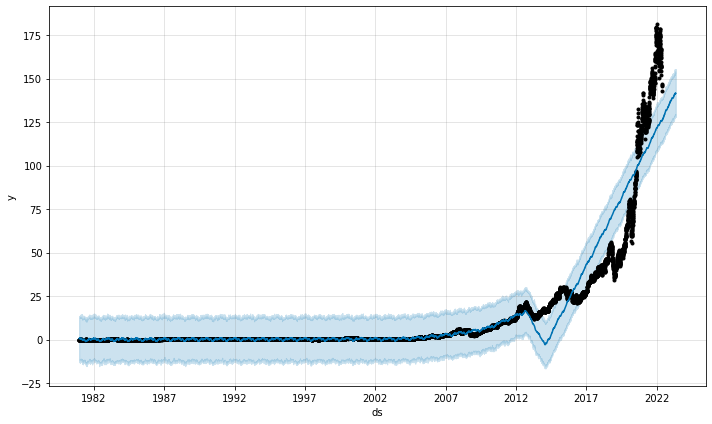

In [ ]:
m.plot(forecast);

## Make it a Function

In [ ]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-12-12,0.083231,-11.367719,13.368256,0.083231,0.083231,0.476287,0.476287,0.476287,-0.082716,-0.082716,-0.082716,0.559002,0.559002,0.559002,0.0,0.0,0.0,0.559517
1,1980-12-15,0.083359,-11.335847,13.706482,0.083359,0.083359,0.628321,0.628321,0.628321,0.008081,0.008081,0.008081,0.620240,0.620240,0.620240,0.0,0.0,0.0,0.711680
2,1980-12-16,0.083401,-12.711316,12.686323,0.083401,0.083401,0.673480,0.673480,0.673480,0.032249,0.032249,0.032249,0.641231,0.641231,0.641231,0.0,0.0,0.0,0.756882
3,1980-12-17,0.083444,-13.470820,13.409568,0.083444,0.083444,0.695684,0.695684,0.695684,0.033443,0.033443,0.033443,0.662241,0.662241,0.662241,0.0,0.0,0.0,0.779128
4,1980-12-18,0.083487,-11.957837,13.305421,0.083487,0.083487,0.674021,0.674021,0.674021,-0.009040,-0.009040,-0.009040,0.683061,0.683061,0.683061,0.0,0.0,0.0,0.757508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10620,2022-11-08,134.012471,122.077266,147.274539,133.965599,134.075889,0.129130,0.129130,0.129130,0.032249,0.032249,0.032249,0.096881,0.096881,0.096881,0.0,0.0,0.0,134.141601
10621,2022-11-09,134.055340,122.106968,145.565785,134.004637,134.121204,0.133860,0.133860,0.133860,0.033443,0.033443,0.033443,0.100417,0.100417,0.100417,0.0,0.0,0.0,134.189200
10622,2022-11-10,134.098209,121.953856,146.406615,134.044447,134.165572,0.096053,0.096053,0.096053,-0.009040,-0.009040,-0.009040,0.105093,0.105093,0.105093,0.0,0.0,0.0,134.194261
10623,2022-11-11,134.141077,120.947616,147.585847,134.082515,134.211413,0.028209,0.028209,0.028209,-0.082716,-0.082716,-0.082716,0.110924,0.110924,0.110924,0.0,0.0,0.0,134.169286


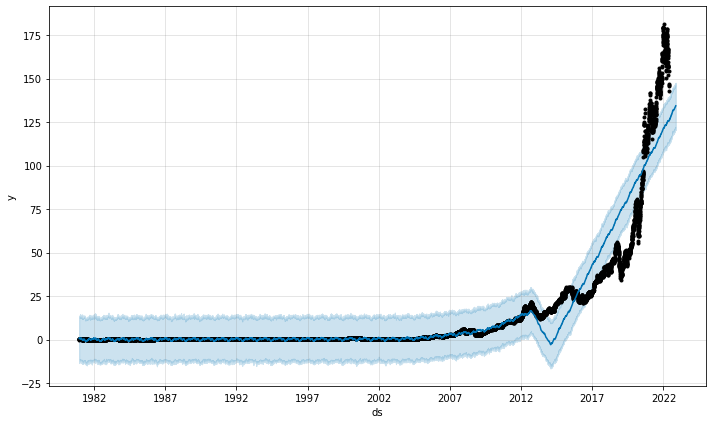

In [ ]:
make_forecast(stock, 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
11170,2024-05-11,157.646805,143.296970,171.279598,154.100610,161.311464,-0.511546,-0.511546,-0.511546,-0.001659,-0.001659,-0.001659,-0.509887,-0.509887,-0.509887,0.0,0.0,0.0,157.135259
11171,2024-05-12,157.689705,144.113869,170.459131,154.135551,161.364184,-0.563686,-0.563686,-0.563686,-0.001659,-0.001659,-0.001659,-0.562027,-0.562027,-0.562027,0.0,0.0,0.0,157.126019
11172,2024-05-13,157.732606,144.045174,171.170769,154.170491,161.416904,-0.601142,-0.601142,-0.601142,0.012540,0.012540,0.012540,-0.613681,-0.613681,-0.613681,0.0,0.0,0.0,157.131465
11173,2024-05-14,157.775507,143.787482,170.992355,154.205581,161.469623,-0.628261,-0.628261,-0.628261,0.036076,0.036076,0.036076,-0.664337,-0.664337,-0.664337,0.0,0.0,0.0,157.147246
11174,2024-05-15,157.818408,144.552892,171.001763,154.241414,161.522343,-0.675982,-0.675982,-0.675982,0.037514,0.037514,0.037514,-0.713497,-0.713497,-0.713497,0.0,0.0,0.0,157.142426


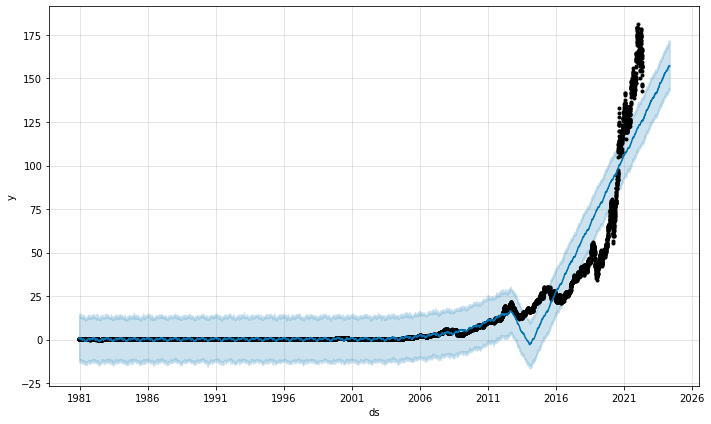

In [ ]:
make_forecast(stock, 365 * 2).tail()

,ds,yhat,yhat_lower,yhat_upper
10445,2022-05-17,125.860728,112.506822,139.091223
10446,2022-05-18,125.861530,112.739514,139.047343
10447,2022-05-19,125.821823,113.183180,138.429493
10448,2022-05-20,125.754467,113.610678,137.969425
10449,2022-05-21,125.845224,112.199297,138.918998
...,...,...,...,...
10805,2023-05-12,141.470266,128.397935,153.920221
10806,2023-05-13,141.542579,127.561707,153.582639
10807,2023-05-14,141.534163,128.984979,154.200386
10808,2023-05-15,141.536420,129.067212,154.275432


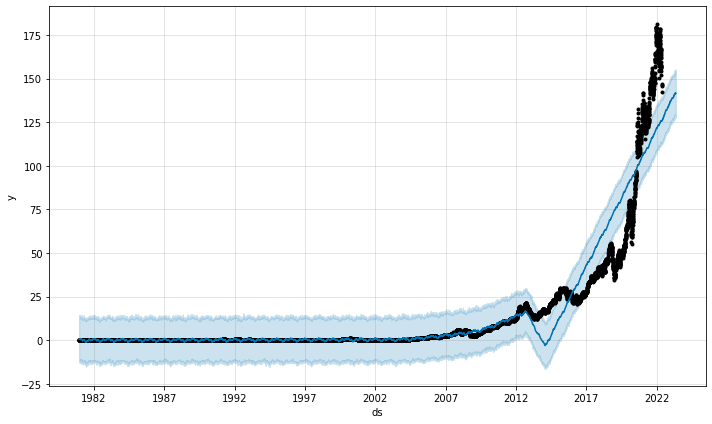

In [ ]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast(stock, n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast